In [1]:
from phasenet.zernike import ZernikeWavefront
from phasenet.psf import PsfGenerator3D
import matplotlib.pyplot as plt
import numpy as np

## PSF generation in 3 steps

STEP 1 : Setup the PSFGenerator according to the microscope parameters (units are in µm)

In [2]:
psf = PsfGenerator3D(psf_shape=(64,)*3, units=(0.1,)*3, na_detection=1.1, lam_detection=.5, n=1.33) 

/home/uschmidt/research/phasenet/phasenet/psf.py:46: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(1. * self.n ** 2 - KR3 ** 2 * lam_detection ** 2)


STEP 2 : Define a wavefront as a ZernikeWavefront object

In [3]:
wf = ZernikeWavefront({3:0.1}, order='ansi')

#Note :  See wavefront notebook for further explanantion of STEP 2

STEP 3 : Generate the PSF

In [4]:
h1 = psf.incoherent_psf(wf, normed=True)

Visualize

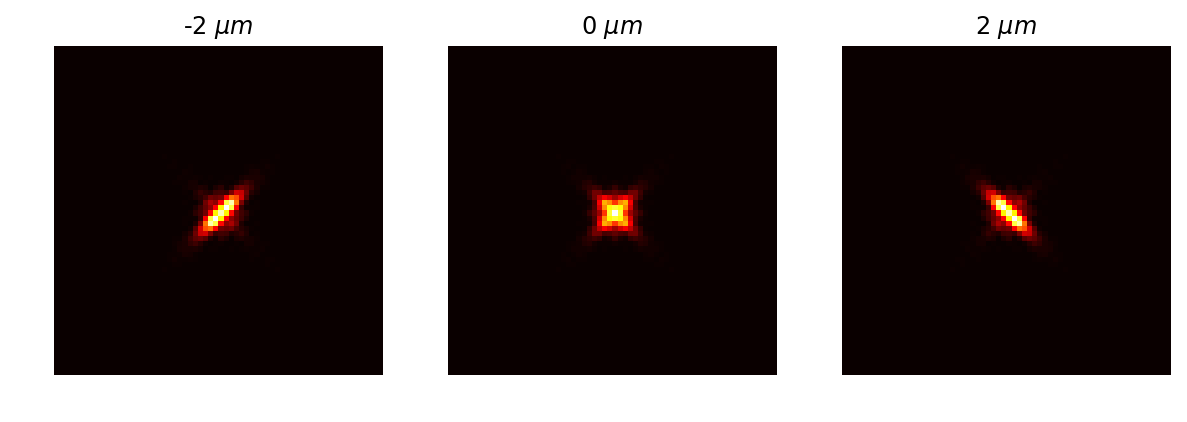

In [5]:
plt.figure(figsize=(10,10));
for i in range(3):
    plt.subplot(1,3,i+1);
    mid_plane = h1.shape[0]//2;
    plt.imshow(h1[(mid_plane-2)+i*2],cmap="hot");
    plt.title(f"{-2+i*2} $\mu m$")
    plt.axis('OFF');
None;

Visualize

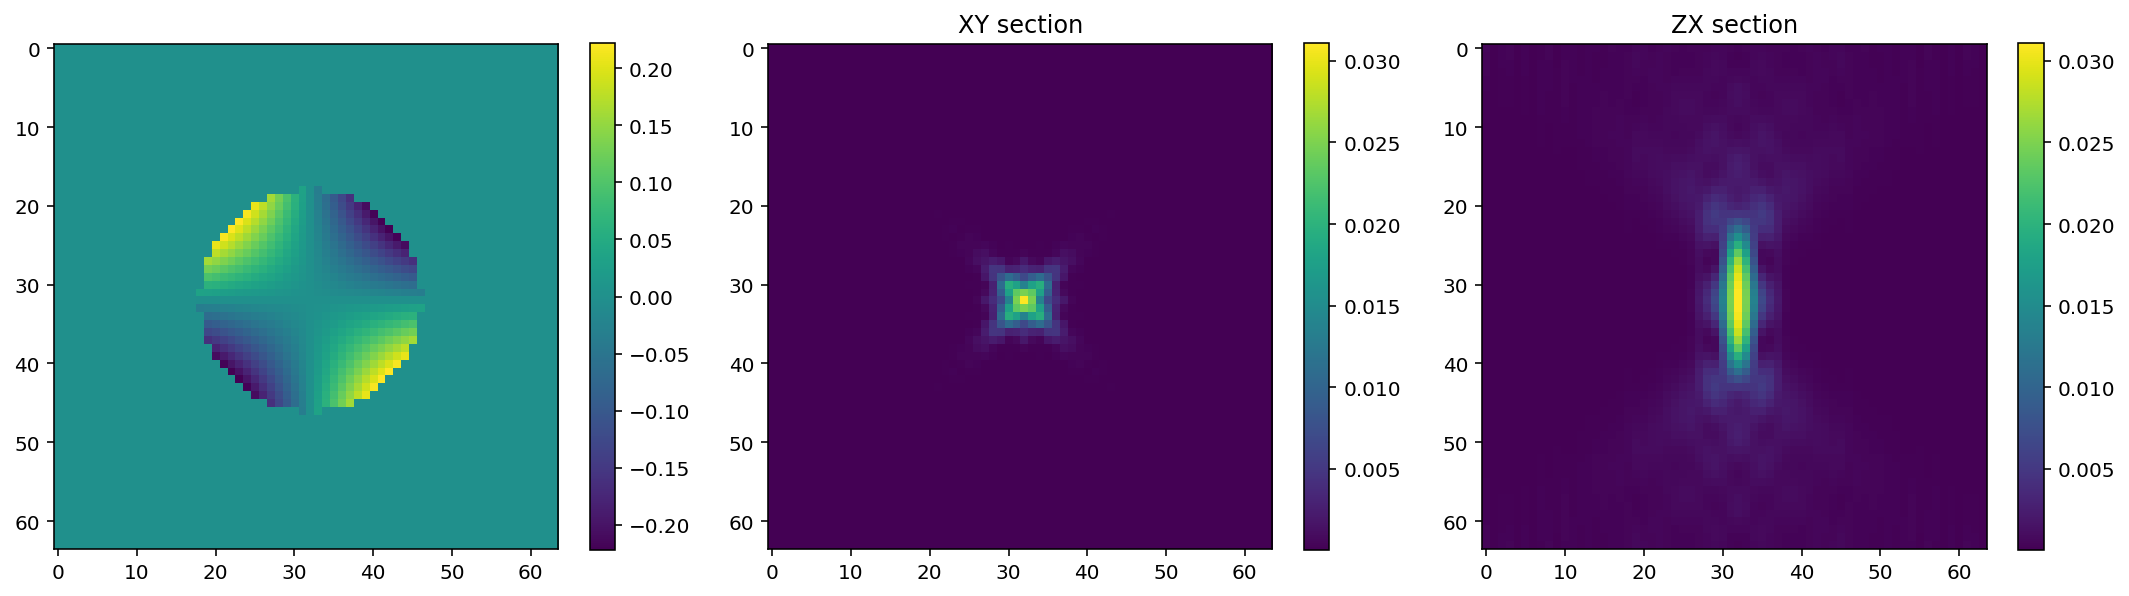

In [6]:
plt.figure(figsize=(15,4))
phase = wf.phase(psf.krho, psf.kphi, normed=True, outside=None)
phase = np.fft.fftshift(phase)
plt.subplot(131); plt.imshow(phase); plt.colorbar()
N = h1.shape[0]
plt.subplot(132); plt.imshow(h1[N//2]);   plt.title('XY section'); plt.colorbar()
plt.subplot(133); plt.imshow(h1[:,N//2]); plt.title('ZX section'); plt.colorbar()
plt.tight_layout()
None;